# Basic Model

Build a single steady disc model and compute the composition using the default abundances

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn-talk')

%matplotlib inline


### Define constants describing the disc model

In [6]:
Mdot_gas = 1e-8
Mdot_dust = 1e-9
Stokes = lambda R: 0.01

T = lambda R: 150*(R/Rau)**-0.5
alpha = lambda R: 1e-3

### Build a grid and the background disc model

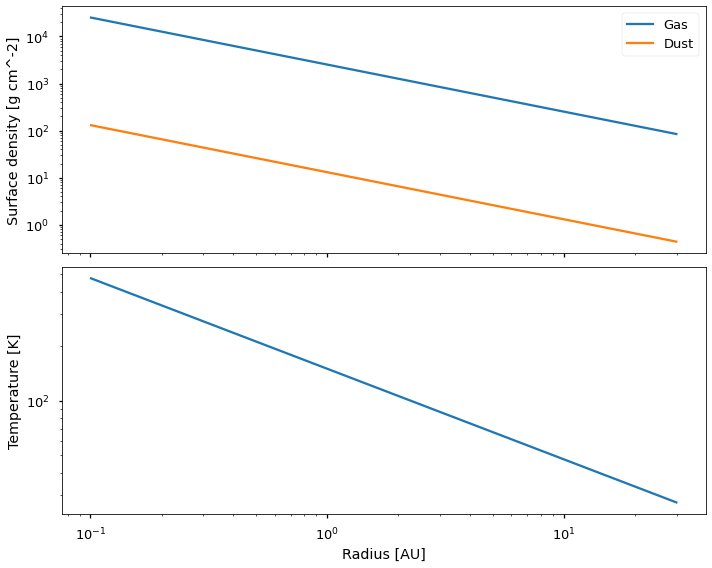

In [7]:
from drift_composition.constants import Rau
from drift_composition.grid import Grid
from drift_composition.disc import DiscModel

grid = Grid(0.1*Rau, 30*Rau, 512)

DM = DiscModel(grid, Mdot_gas, alpha, T)

DM.compute_dust_surface_density(Mdot_dust, Stokes)

f, ax = plt.subplots(2, figsize=(10, 8), sharex=True)

ax[0].loglog(grid.Rc/Rau, DM.Sigma_gas, label='Gas')
ax[0].loglog(grid.Rc/Rau, DM.Sigma_dust, label='Dust')
ax[0].set_ylabel('Surface density [g cm^-2]')
ax[0].legend()

ax[1].loglog(grid.Rc/Rau, T(grid.Rc))
ax[1].set_xlabel('Radius [AU]')
ax[1].set_ylabel('Temperature [K]')
ax[0].legend()

f.tight_layout()

### Compute the chemical structure

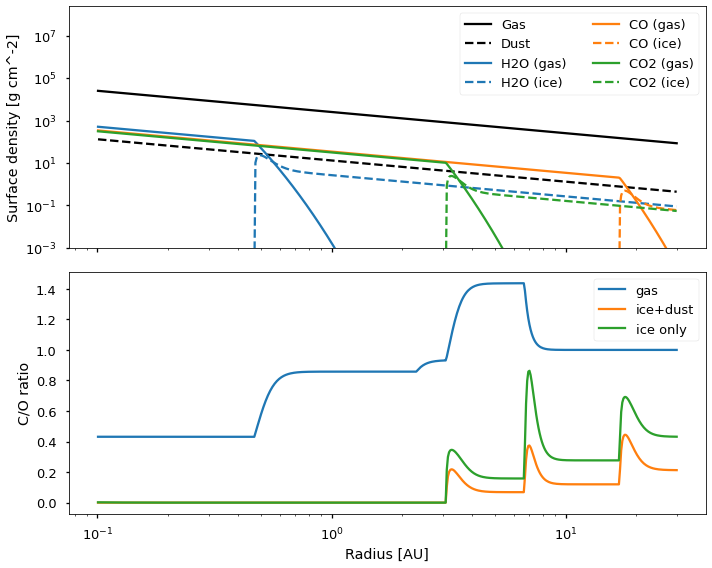

<Figure size 432x288 with 0 Axes>

In [8]:

from drift_composition.molecule import get_molecular_properties

species, abundances = get_molecular_properties()
DM.compute_chemistry(species, abundances )

    
f, ax = plt.subplots(2, figsize=(10, 8), sharex=True)

ax[0].loglog(grid.Rc/Rau, DM.Sigma_gas, label='Gas', c='k')
ax[0].loglog(grid.Rc/Rau, DM.Sigma_dust, label='Dust', c='k', ls='--')
for spec in ['H2O', 'CO', 'CO2']:
    l,= ax[0].loglog(grid.Rc/Rau, DM.Sigma_mol[spec][:,0], label=f'{spec} (gas)')
    ax[0].loglog(grid.Rc/Rau, DM.Sigma_mol[spec][:,1], label=f'{spec} (ice)', ls='--', c=l.get_color())

ax[0].set_ylabel('Surface density [g cm^-2]')
ax[0].legend(ncol=2)
ax[0].set_ylim(ymin=1e-3)

columns = DM.compute_elemental_column(dust={'FeMgSiO4' : 1})
C2O = columns['C']/columns['O']

columns = DM.compute_elemental_column(dust=None)
C2O_ice = columns['C']/columns['O']

plt.figure()
ax[1].semilogx(grid.Rc/Rau, C2O[:,0], label='gas')
ax[1].semilogx(grid.Rc/Rau, C2O[:,1], label='ice+dust')
ax[1].semilogx(grid.Rc/Rau, C2O_ice[:,1], label='ice only')

ax[1].set_xlabel('Radius [AU]')
ax[1].set_ylabel('C/O ratio')
ax[1].legend()

f.tight_layout()

